<h1 style="text-align:center; color:#005bbd; font-size:20px; font-family:Sans-serif; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px Black;">
   Image Data 
</h1>

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       <p>Image data ko samajhne ke liye hum unhe pixels ke terms mein represent karte hain.
        <br>Ek image actually ek grid hoti hai, jisme har cell (ya pixel) ko ek color value assign ki gai hoti hai.</p>
</div>
</body>

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
        Grayscale Images:<ul>
       <p> Yeh images sirf shades of gray mein hoti hain, jahan har pixel ka ek value hota hai, jo 0 se 255 ke beech hota hai (black to white).</p></ul>
</div>
</body>

In [2]:
from io import BytesIO
from PIL import Image
import requests
import numpy as np

In [3]:
url = "https://images.unsplash.com/photo-1626808642875-0aa545482dfb?q=80&w=1974&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"  # Aap yahan apna image URL daal sakte hain
response = requests.get(url)
img_byte_array = BytesIO(response.content)  # Binary data from response

img = Image.open(img_byte_array)
img = img.resize(size=(200,300))

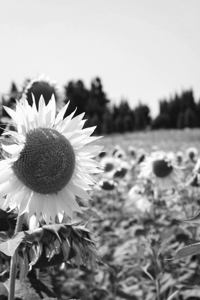

In [4]:
img_array = np.array(img)
Image.fromarray(img_array[:,:,(0)])

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
        RGB Images:<ul>
       <p>  Yeh images 3 color channels (Red, Green, Blue) mein represent hoti hain. Har pixel ki 3 values hoti hain, jo 0 se 255 ke beech hoti hain.</p></ul>
</div>
</body>

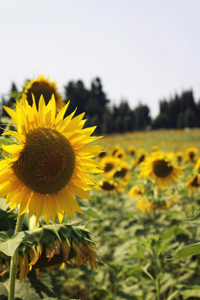

In [5]:
Image.fromarray(img_array[:,:,(0,1,2)])

In [6]:
img_array[:,:,(0,1,2)].shape # 3 means channel (RGB)

(300, 200, 3)

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
        RGBA Images:<ul>
       <p> RGB images jisme ek additional Alpha (transparency) channel bhi hota hai.
</p></ul>
</div>
</body>

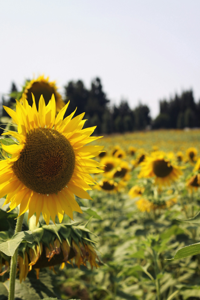

In [7]:
img_rgba = img.convert("RGBA")
img_rgba

In [8]:
np.array(img_rgba).shape # 0,1,2 rgb and 3 is alpha

(300, 200, 4)

In [10]:
r, g, b, a = img_rgba.split()

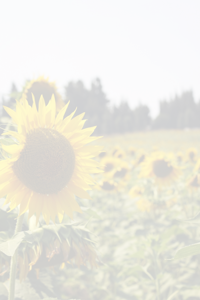

In [11]:
alpha = 50
Image.merge("RGBA", (r, g, b, a.point(lambda i: alpha)))

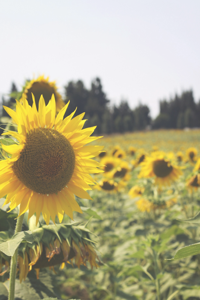

In [12]:
alpha = 200
Image.merge("RGBA", (r, g, b, a.point(lambda i: alpha)))

<h1 style="text-align:center; color:#005bbd; font-size:20px; font-family:Sans-serif; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px Black;">
   Audio Data
</h1>

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       <p>Audio data ko samajhne ke liye hume sound waves ko digital signals mein convert karte hain. <br>Audio data ko typically waveforms aur spectrograms mein represent kiya jata hai.</p>
</div>
</body>

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       Waveform:<ul>
       <p>Audio signal ko ek continuous waveform ke form mein represent kiya jata hai.
           <br>Isme time domain ke andar amplitude of the sound wave dikhaya jata hai.</p></ul>
</div>
</body>

In [122]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [123]:
audio_path = '/home/mubeen/Downloads/sample.WAV'

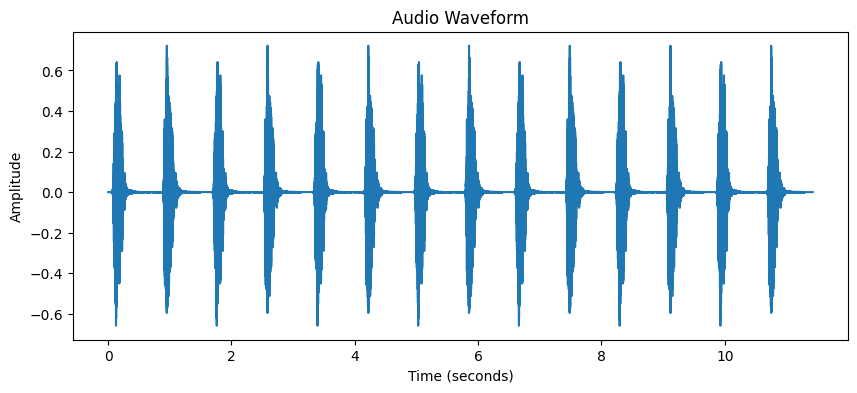

In [124]:
y, sr = librosa.load(audio_path, sr=None)  
# y = audio signal, sr = sample rate

# Plotting the waveform
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y)
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       Spectrogram:<ul>
       <p>Yeh sound signal ko frequency domain mein represent karta hai.<br>Spectrogram audio ki frequency content ko time ke saath show karta hai.</p></ul>
</div>
</body>

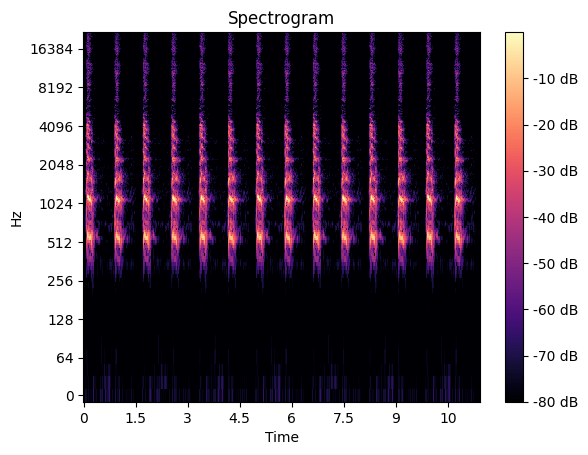

In [129]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       MFCC (Mel-Frequency Cepstral Coefficients):<ul>
       <p>MFCC (Mel-Frequency Cepstral Coefficients) aik compact representation hai jo zyada tar speech recognition mein use hoti hai.
<br><br>
            MFCC audio signal se features extract karta hai jo sound ke timbre ko represent karte hain. Yeh speech recognition, speaker identification, aur emotion detection jese tasks ke liye bohot useful hai.</p></ul>
</div>
</body>

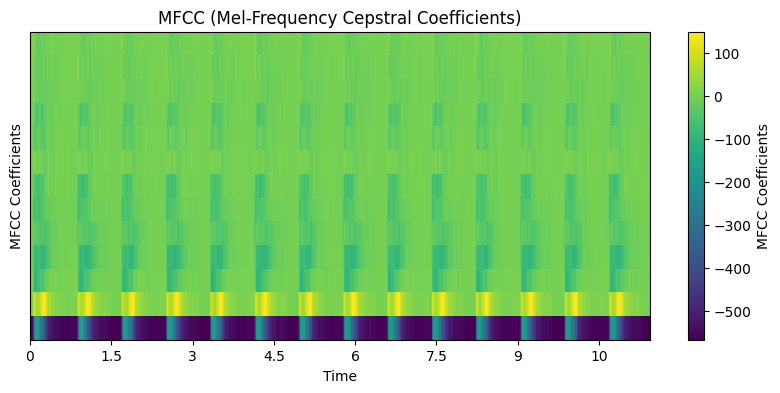

In [130]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # 13 MFCC coefficients

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr, cmap="viridis")
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC (Mel-Frequency Cepstral Coefficients)")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

<body style="font-family: Sans-serif;">
    <div style="color: black; font-size: 18px; font-style: oblique; text-shadow: 0 0 3px white, 0 0 1px black; padding: 20px;">
       <p>Image aur audio data ko machine learning mein use karne se pehle unhe numerical form mein convert karna padta hai, jise algorithms samajh sakein. <br><br>For Example:<br> <ul>images, aap NumPy arrays ka use karte hain,<br>aur audio ke liye waveform ya MFCC features ka use kiya jata hai.
</div>
</body>